**Heston** Model

In [ ]:
#LAB 4
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt



In [ ]:
K=99
S0=100
K=100
v0=0.04
llambda=1
vbar=0.04
eta=0.1
rho=0.5
r=0
N=20
Delta=0.05
NbScenarios = 1000
sumS=0
sumV=0
sqrS=0
sqrV=0
r=0.04

In [ ]:
np.random.seed(37)
S=np.zeros([N+2, NbScenarios+1])
v=np.zeros([N+2, NbScenarios+1])
def Mymax(x,y):
    if x>y:
        return  x
    else:
        return y

for Scen in range(1, NbScenarios+1):
    S[0][Scen]=S0
    v[0][Scen]=v0
    for i in range(1, N+1):
        z1=np.random.normal()
        z2=????
        S[i][Scen]=S[i-1][Scen]*    ??? 'complete the Euler scheme for S
        drift=-llambda*(v[i-1][Scen]-vbar)*Delta
        vol=eta*(math.sqrt(v[i-1][Scen]))*(rho*z1+math.sqrt(1-rho**2)*z2)*math.sqrt(Delta)
        v[i][Scen]=v[i-1][Scen]+drift+vol
    sumS = sumS + S[N][Scen]    'to calculate E[S]
    sqrS = sqrS + S[N][Scen]**2 'to calculate E[S^2]  ---> (and then variance)
    sumV = sumV + ???    'to calculate E[vol]
    sqrV = sqrV + ??? 'to calculate E[vol^2]

print("E[S]=",sumS/NbScenarios)
print("Var[S]=", sqrS/NbScenarios-(sumS/NbScenarios)**2)
print("E[vol]=",sumV/NbScenarios)
print("Var[vol]=",sqrV/NbScenarios-(sumV/NbScenarios)**2)

CallPrice=0
'make a loop to calculate the Call price by Monte Carlo simulation'
print("CallPrice =", CallPrice)

SyntaxError: unterminated string literal (detected at line 16) (<ipython-input-3-df2ba2c36117>, line 16)

Corrected Code

In [ ]:
np.random.seed(37)
S = np.zeros([N + 1, NbScenarios])
v = np.zeros([N + 1, NbScenarios])

#in this model, volatility cannot go below zero
def Mymax(x, y):
    if x > y:
        return x
    else:
        return y

In [ ]:

for Scen in range(NbScenarios):
    S[0, Scen] = S0
    v[0, Scen] = v0
    for i in range(1, N + 1):
        z1 = np.random.normal()
        z2 = np.random.normal()
        #S(t + Δt) = S(t) * exp((r - 0.5 * v(t)) * Δt + sqrt(v(t) * Δt) * Z)
        S[i, Scen] = S[i - 1, Scen] * np.exp((r - 0.5 * v[i - 1, Scen]) * Delta + np.sqrt(v[i - 1, Scen] * Delta) * (rho * z1 + np.sqrt(1 - rho**2) * z2))
        drift = -llambda * (v[i - 1, Scen] - vbar) * Delta
        vol = eta * np.sqrt(v[i - 1, Scen]) * (rho * z1 + np.sqrt(1 - rho**2) * z2) * np.sqrt(Delta)
        v[i, Scen] = Mymax(v[i - 1, Scen] + drift + vol,0)  # Ensuring volatility is non-negative

sumS = np.sum(S[N, :])
sqrS = np.sum(S[N, :]**2)
sumV = np.sum(v[N, :])
sqrV = np.sum(v[N, :]**2)

print("E[S]=", sumS / NbScenarios)
print("Var[S]=", sqrS / NbScenarios - (sumS / NbScenarios)**2)
print("E[vol]=", sumV / NbScenarios)
print("Var[vol]=", sqrV / NbScenarios - (sumV / NbScenarios)**2)

E[S]= 103.70064635018365
Var[S]= 481.09787522564875
E[vol]= 0.039510008234891605
Var[vol]= 0.00017919464927241202


In [ ]:
CallPrice = np.exp(-r * N * Delta) * np.sum(np.maximum(S[N, :] - K, 0)) / NbScenarios
print("CallPrice =", CallPrice)

CallPrice = 9.591288126056998


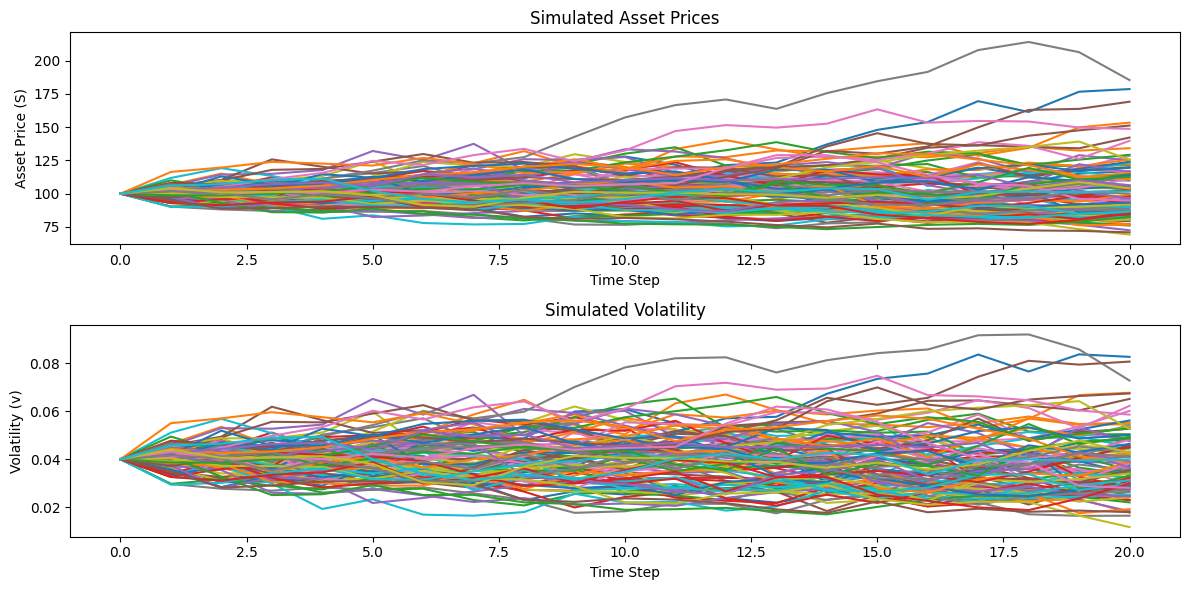

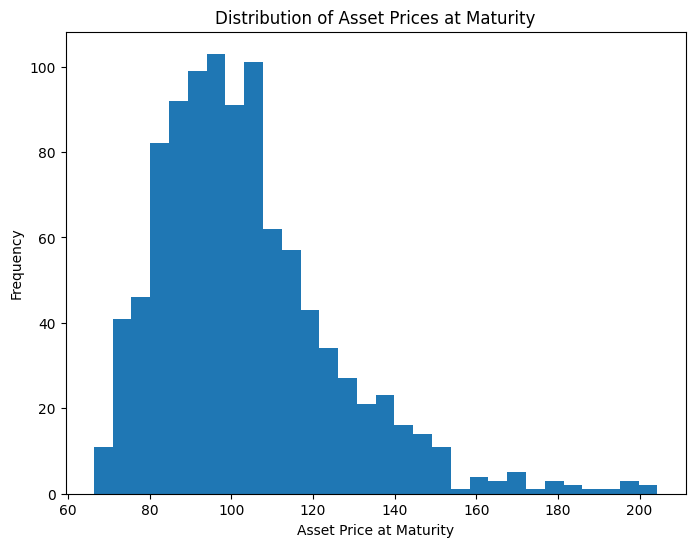

In [ ]:

# Visualizations
plt.figure(figsize=(12, 6))

# Plot S
plt.subplot(2, 1, 1)
for i in range(min(NbScenarios, 100)): #plot a subset of the scenarios
    plt.plot(S[:, i])
plt.xlabel('Time Step')
plt.ylabel('Asset Price (S)')
plt.title('Simulated Asset Prices')


# Plot v
plt.subplot(2, 1, 2)
for i in range(min(NbScenarios, 100)):
    plt.plot(v[:,i])
plt.xlabel("Time Step")
plt.ylabel("Volatility (v)")
plt.title("Simulated Volatility")


plt.tight_layout()
plt.show()

# Histogram of S at maturity
plt.figure(figsize=(8, 6))
plt.hist(S[N, :], bins=30)
plt.xlabel('Asset Price at Maturity')
plt.ylabel('Frequency')
plt.title('Distribution of Asset Prices at Maturity')
plt.show()


E[S]= 103.70064635018365
Var[S]= 481.09787522564875
E[vol]= 0.039510008234891605
Var[vol]= 0.00017919464927241202
CallPrice = 9.591288126056998


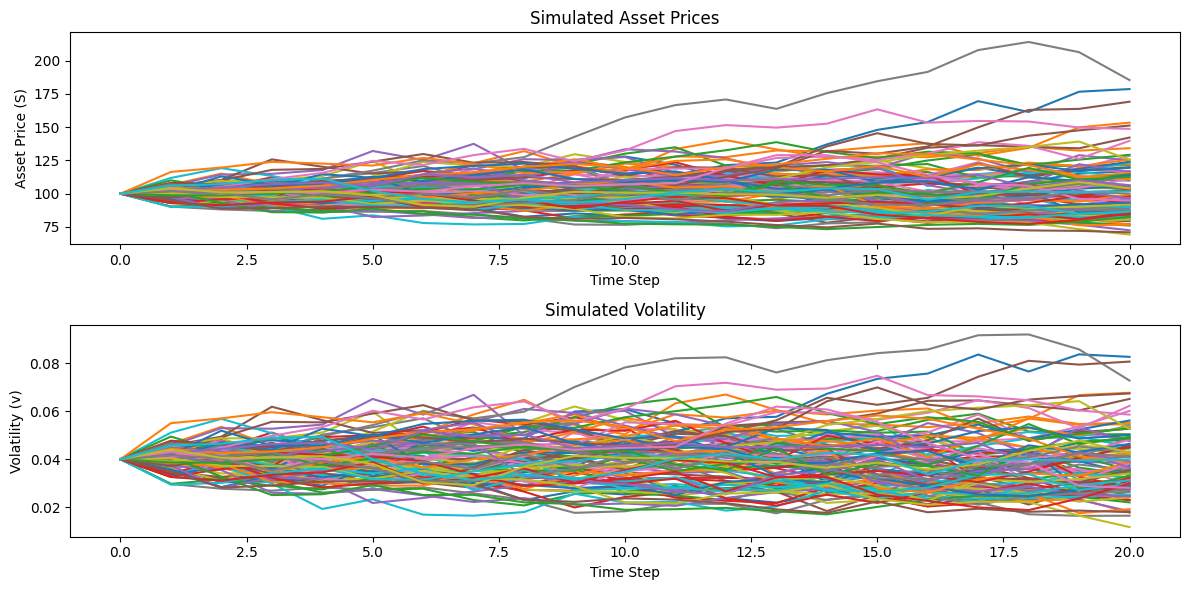

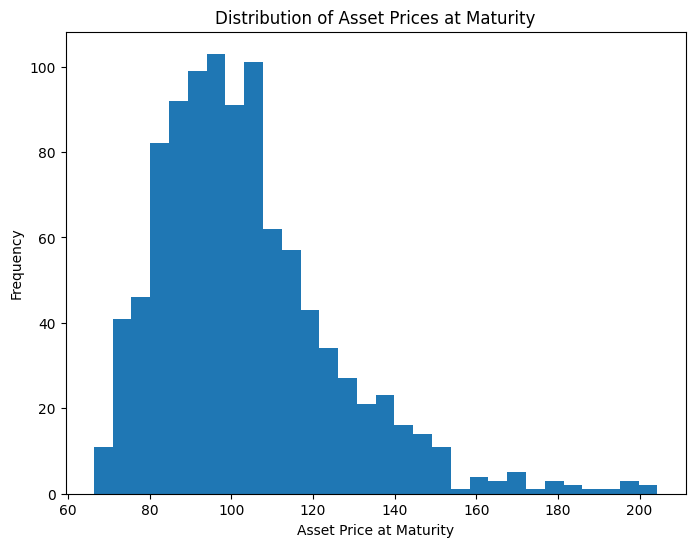

In [ ]:
# prompt: please add visiaulizations and graphs for this solution

import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

# Heston Model

K = 99
S0 = 100
K = 100
v0 = 0.04
llambda = 1
vbar = 0.04
eta = 0.1
rho = 0.5
r = 0
N = 20
Delta = 0.05
NbScenarios = 1000
sumS = 0
sumV = 0
sqrS = 0
sqrV = 0
r = 0.04
np.random.seed(37)

S = np.zeros([N + 1, NbScenarios])
v = np.zeros([N + 1, NbScenarios])

def Mymax(x, y):
    if x > y:
        return x
    else:
        return y

for Scen in range(NbScenarios):
    S[0, Scen] = S0
    v[0, Scen] = v0
    for i in range(1, N + 1):
        z1 = np.random.normal()
        z2 = np.random.normal()
        S[i, Scen] = S[i - 1, Scen] * np.exp((r - 0.5 * v[i - 1, Scen]) * Delta + np.sqrt(v[i - 1, Scen] * Delta) * (rho * z1 + np.sqrt(1 - rho**2) * z2))
        drift = -llambda * (v[i - 1, Scen] - vbar) * Delta
        vol = eta * np.sqrt(v[i - 1, Scen]) * (rho * z1 + np.sqrt(1 - rho**2) * z2) * np.sqrt(Delta)
        v[i, Scen] = Mymax(v[i - 1, Scen] + drift + vol, 0)

sumS = np.sum(S[N, :])
sqrS = np.sum(S[N, :]**2)
sumV = np.sum(v[N, :])
sqrV = np.sum(v[N, :]**2)

print("E[S]=", sumS / NbScenarios)
print("Var[S]=", sqrS / NbScenarios - (sumS / NbScenarios)**2)
print("E[vol]=", sumV / NbScenarios)
print("Var[vol]=", sqrV / NbScenarios - (sumV / NbScenarios)**2)

CallPrice = np.exp(-r * N * Delta) * np.sum(np.maximum(S[N, :] - K, 0)) / NbScenarios
print("CallPrice =", CallPrice)


# Visualizations
plt.figure(figsize=(12, 6))

# Plot S
plt.subplot(2, 1, 1)
for i in range(min(NbScenarios, 100)): #plot a subset of the scenarios
    plt.plot(S[:, i])
plt.xlabel('Time Step')
plt.ylabel('Asset Price (S)')
plt.title('Simulated Asset Prices')


# Plot v
plt.subplot(2, 1, 2)
for i in range(min(NbScenarios, 100)):
    plt.plot(v[:,i])
plt.xlabel("Time Step")
plt.ylabel("Volatility (v)")
plt.title("Simulated Volatility")


plt.tight_layout()
plt.show()

# Histogram of S at maturity
plt.figure(figsize=(8, 6))
plt.hist(S[N, :], bins=30)
plt.xlabel('Asset Price at Maturity')
plt.ylabel('Frequency')
plt.title('Distribution of Asset Prices at Maturity')
plt.show()


part 2

E[S]= 103.71381920265834
Var[S]= 974.2330771341312
E[vol]= 0.06090496555494089
Var[vol]= 0.0003258246741322784
CallPrice = 12.771418371198166


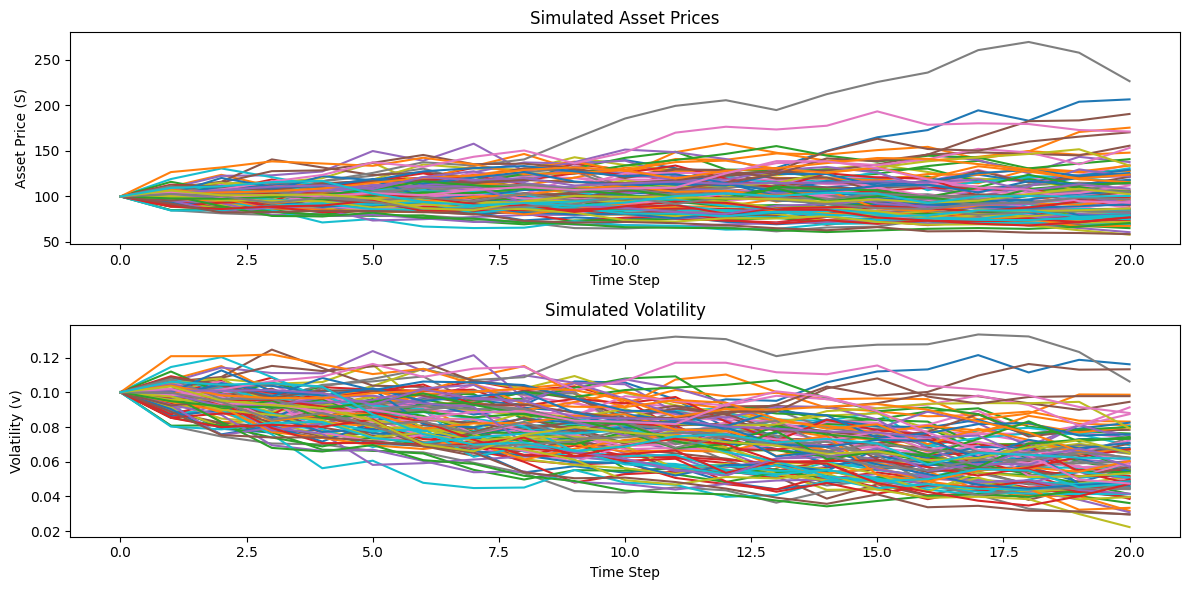

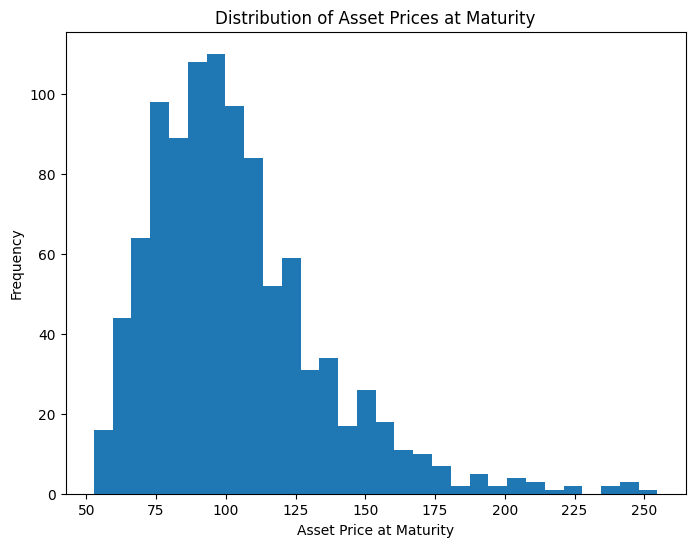

In [ ]:
# prompt: what if interest rate is not zero ?

import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

# Heston Model

K = 99
S0 = 100
K = 100
v0 = 0.10
llambda = 1
vbar = 0.04
eta = 0.1
rho = 0.5
r = 0.04  # Interest rate is now non-zero
N = 20
Delta = 0.05
NbScenarios = 1000

np.random.seed(37)
S = np.zeros([N + 1, NbScenarios])
v = np.zeros([N + 1, NbScenarios])

def Mymax(x, y):
    if x > y:
        return x
    else:
        return y

for Scen in range(NbScenarios):
    S[0, Scen] = S0
    v[0, Scen] = v0
    for i in range(1, N + 1):
        z1 = np.random.normal()
        z2 = np.random.normal()
        S[i, Scen] = S[i - 1, Scen] * np.exp((r - 0.5 * v[i - 1, Scen]) * Delta + np.sqrt(v[i - 1, Scen] * Delta) * (rho * z1 + np.sqrt(1 - rho**2) * z2))
        drift = -llambda * (v[i - 1, Scen] - vbar) * Delta
        vol = eta * np.sqrt(v[i - 1, Scen]) * (rho * z1 + np.sqrt(1 - rho**2) * z2) * np.sqrt(Delta)
        v[i, Scen] = Mymax(v[i - 1, Scen] + drift + vol, 0)

sumS = np.sum(S[N, :])
sqrS = np.sum(S[N, :]**2)
sumV = np.sum(v[N, :])
sqrV = np.sum(v[N, :]**2)

print("E[S]=", sumS / NbScenarios)
print("Var[S]=", sqrS / NbScenarios - (sumS / NbScenarios)**2)
print("E[vol]=", sumV / NbScenarios)
print("Var[vol]=", sqrV / NbScenarios - (sumV / NbScenarios)**2)

CallPrice = np.exp(-r * N * Delta) * np.sum(np.maximum(S[N, :] - K, 0)) / NbScenarios
print("CallPrice =", CallPrice)

# ... (rest of the code for visualization remains the same)

# Visualizations
plt.figure(figsize=(12, 6))

# Plot S
plt.subplot(2, 1, 1)
for i in range(min(NbScenarios, 100)): #plot a subset of the scenarios
    plt.plot(S[:, i])
plt.xlabel('Time Step')
plt.ylabel('Asset Price (S)')
plt.title('Simulated Asset Prices')


# Plot v
plt.subplot(2, 1, 2)
for i in range(min(NbScenarios, 100)):
    plt.plot(v[:,i])
plt.xlabel("Time Step")
plt.ylabel("Volatility (v)")
plt.title("Simulated Volatility")


plt.tight_layout()
plt.show()

# Histogram of S at maturity
plt.figure(figsize=(8, 6))
plt.hist(S[N, :], bins=30)
plt.xlabel('Asset Price at Maturity')
plt.ylabel('Frequency')
plt.title('Distribution of Asset Prices at Maturity')
plt.show()
